In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Ba_reviews_cleaned.csv', index_col = 0)

In [3]:
data.head()

,stars,country,Verified,Reviews
0,5,United Kingdom,True,ba boarding delayed due late arrival incoming ...
1,9,Spain,True,first flight year also first time back england...
2,10,United Kingdom,True,husband flying madrid rd february legal matter...
3,10,United Kingdom,True,organised boarding process really friendly cre...
4,10,United Kingdom,True,outward journey ba london buenos aire club wor...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stars     2999 non-null   int64 
 1   country   2999 non-null   object
 2   Verified  2999 non-null   bool  
 3   Reviews   2999 non-null   object
dtypes: bool(1), int64(1), object(2)
memory usage: 96.6+ KB


# EDA : 

In [5]:
print('Minimum Rating :' ,data['stars'].min())
print('-----------------------------------------')
print('Maximum Rating :' ,data['stars'].max())

Minimum Rating : 1
-----------------------------------------
Maximum Rating : 10


In [6]:
#Checking Mean rating

print('Mean Rating :', data['stars'].mean())

Mean Rating : 4.68322774258086


Text(0.5, 1.0, 'Density Distribution of Ratings')

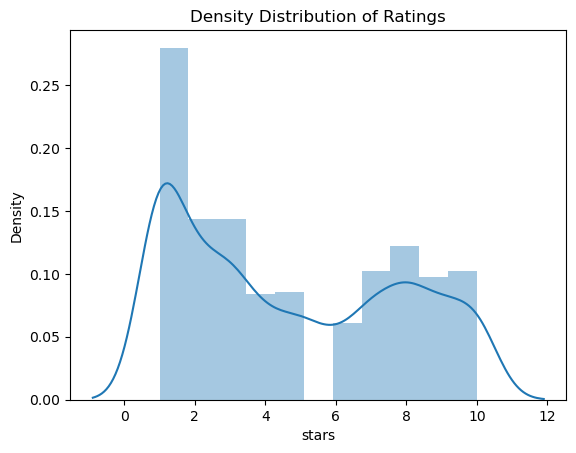

In [7]:
sns.distplot(data['stars'], kde = True)
plt.title('Density Distribution of Ratings')

**Observation :**
- We can see that **majority** of people gave low ratings.

- We can observe a peak between **rating 1 to rating 3**.

<AxesSubplot:xlabel='stars', ylabel='count'>

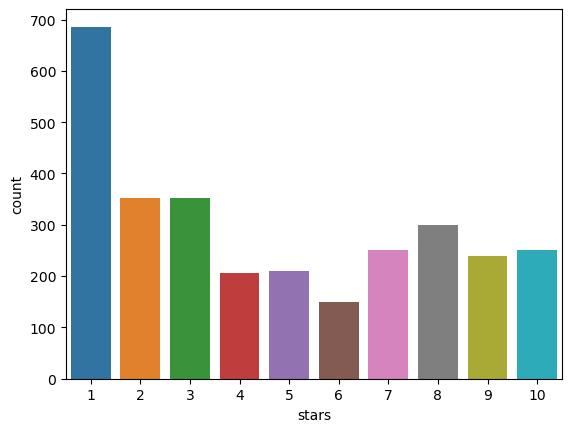

In [8]:
#Checking the counts of each ratings

sns.countplot(data['stars'])

<AxesSubplot:ylabel='Verified'>

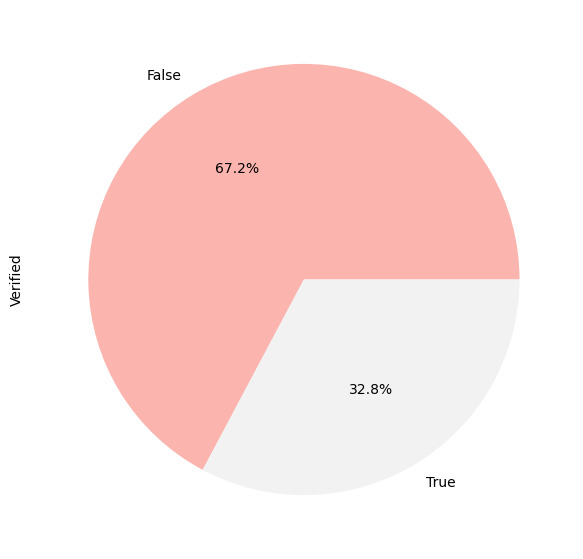

In [9]:
figure = plt.figure(figsize=[7, 7])

(data['Verified'].value_counts().plot(kind = 'pie',autopct='%3.1f%%',cmap = 'Pastel1'))


**Observation :**
- 67.2% people has not verified trips whereas only 32.8% people  has verified trips.

In [10]:
data['country'].nunique()

66

In [11]:
max_country_review = pd.DataFrame(data['country'].value_counts().head())

Text(0.5, 1.0, 'Maximum number of reviews by Country')

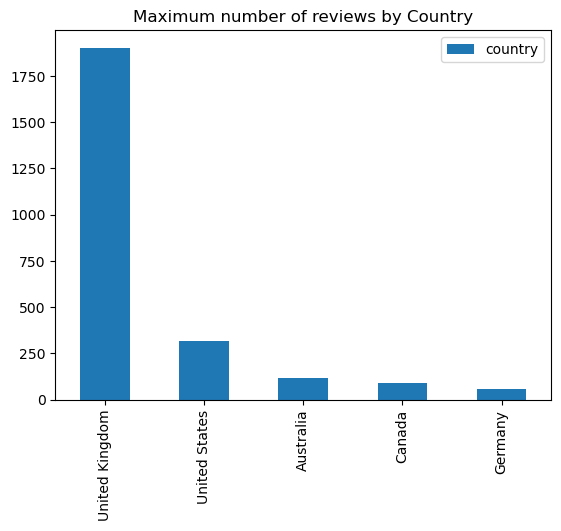

In [12]:
max_country_review.plot.bar()
plt.title('Maximum number of reviews by Country')

**Observation :**
- Most of the reviews comes from United Kingdom as compared to other Countries.

In [13]:
from wordcloud import WordCloud, STOPWORDS
import wikipedia
from PIL import Image
import nltk
from nltk.corpus import stopwords

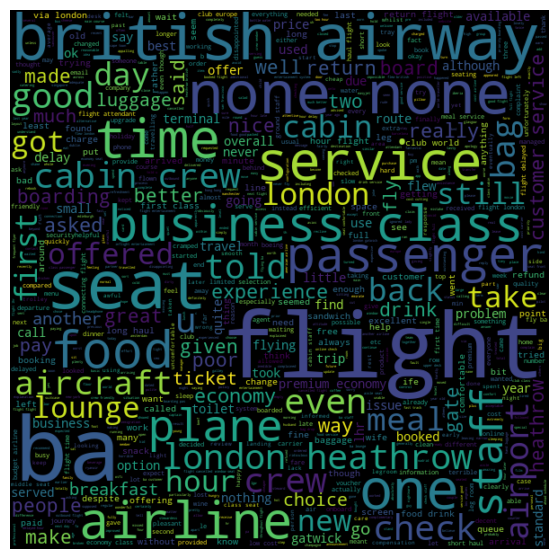

In [14]:
# Generate a word cloud image
Reviews = " ".join(data['Reviews'])
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=800).generate(Reviews)
plt.figure(figsize=(7,7))
# Show the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

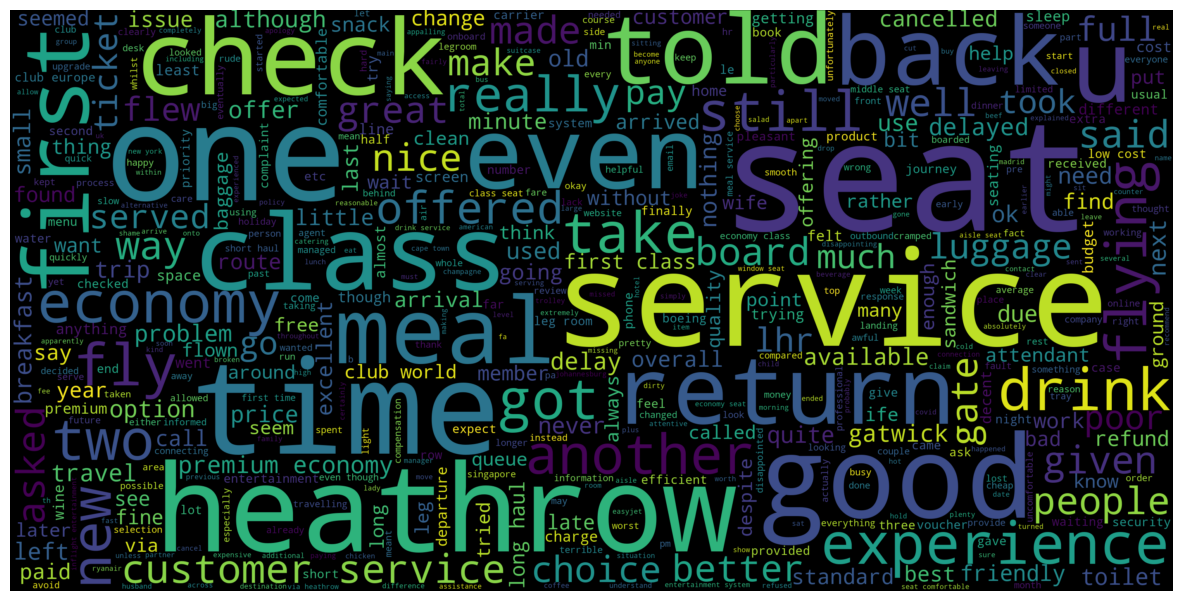

In [15]:
# Add unnecessary words to the stop words list
stop_words = set(stopwords.words("english"))
stop_words.update(["ba", "british", "airway", "london", "flight", "none", "plane", "crew", "cabin", "terminal", "business",
                  "booking", "bag", "food", "aircraft", "passenger", "airport", "booked", "lounge", "day", "staff", "boarding",
                  "hour", "airline"])

# Filter out stop words from the text
tokens = nltk.word_tokenize(Reviews)
tokens = [word for word in tokens if word.lower() not in stop_words]
filtered_text = " ".join(tokens)

# Generate a word cloud image
wordcloud = WordCloud(height=1500,width=3000,max_font_size=400, max_words=500).generate(filtered_text)

# Show the word cloud
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis :

In [16]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidde\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(Reviews):
    return sentiment_analyzer.polarity_scores(Reviews)['compound']

def get_sentiment_class(Reviews):
    compound = sentiment_analyzer.polarity_scores(Reviews)['compound']
    result = ''
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
data['sentiment_score'] = data['Reviews'].apply(get_sentiment_score)

In [19]:
data['sentiment'] = data['Reviews'].apply(get_sentiment_class)

In [20]:
data.head()

,stars,country,Verified,Reviews,sentiment_score,sentiment
0,5,United Kingdom,True,ba boarding delayed due late arrival incoming ...,0.9524,Positive
1,9,Spain,True,first flight year also first time back england...,0.9840,Positive
2,10,United Kingdom,True,husband flying madrid rd february legal matter...,0.9878,Positive
3,10,United Kingdom,True,organised boarding process really friendly cre...,0.9371,Positive
4,10,United Kingdom,True,outward journey ba london buenos aire club wor...,-0.2500,Negative


<AxesSubplot:ylabel='sentiment'>

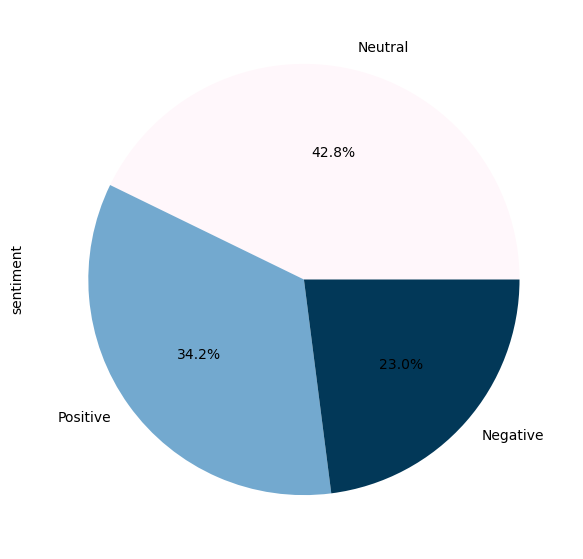

In [21]:
figure = plt.figure(figsize=[7, 7])

(data['sentiment'].value_counts().plot(kind = 'pie',autopct='%3.1f%%',cmap = 'PuBu'))

In [22]:
data['sentiment'].value_counts()

Neutral     1283
Positive    1027
Negative     689
Name: sentiment, dtype: int64